# Описание проекта

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

Вам предоставлены пробы нефти в трёх регионах. Характеристики для каждой скважины в регионе уже известны. Постройте модель для определения региона, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой Bootstrap.

# Описание данных

- **id** — уникальный идентификатор скважины;
- **f0, f1, f2** — три признака точек (неважно, что они означают, но сами признаки значимы);
- **product** — объём запасов в скважине (тыс. баррелей).

# Условия задачи

- Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).
- При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
- Бюджет на разработку скважин в регионе — 10 млрд рублей.
- При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
- После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.

# Содержание

>[1. Подготовка даннных](#id-open) \
>[2. Обучение и проверка модели](#id-fit) \
>[3. Подготовка к расчёту прибыли](#id-profitprep) \
>[4. Расчёт прибыли и рисков](#id-profitrisks)

# 1. Загрузка и подготовка данных<a id="id-open"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from matplotlib.pyplot import figure
from sklearn.utils import shuffle
import numpy as np
import warnings
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
warnings.simplefilter('ignore')

In [2]:
r1  = pd.read_csv("")
r2 = pd.read_csv("")
r3 = pd.read_csv("")

In [3]:
r1.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [4]:
r2.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [5]:
r3.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [6]:
r1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [7]:
r2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [8]:
r3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [9]:
r1.describe().T

,count,mean,std,min,25%,50%,75%,max
f0,100000.0,0.500419,0.871832,-1.408605,-0.072580,0.502360,1.073581,2.362331
f1,100000.0,0.250143,0.504433,-0.848218,-0.200881,0.250252,0.700646,1.343769
f2,100000.0,2.502647,3.248248,-12.088328,0.287748,2.515969,4.715088,16.003790
product,100000.0,92.500000,44.288691,0.000000,56.497507,91.849972,128.564089,185.364347


In [10]:
r2.describe().T

,count,mean,std,min,25%,50%,75%,max
f0,100000.0,1.141296,8.965932,-31.609576,-6.298551,1.153055,8.621015,29.421755
f1,100000.0,-4.796579,5.119872,-26.358598,-8.267985,-4.813172,-1.332816,18.734063
f2,100000.0,2.494541,1.703572,-0.018144,1.000021,2.011479,3.999904,5.019721
product,100000.0,68.825000,45.944423,0.000000,26.953261,57.085625,107.813044,137.945408


In [11]:
r3.describe().T

,count,mean,std,min,25%,50%,75%,max
f0,100000.0,0.002023,1.732045,-8.760004,-1.162288,0.009424,1.158535,7.238262
f1,100000.0,-0.002081,1.730417,-7.084020,-1.174820,-0.009482,1.163678,7.844801
f2,100000.0,2.495128,3.473445,-11.970335,0.130359,2.484236,4.858794,16.739402
product,100000.0,95.000000,44.749921,0.000000,59.450441,94.925613,130.595027,190.029838


In [12]:
r1_y = r1["product"]
r1_X = r1[["f0", "f1", "f2"]]
r2_y = r2["product"]
r2_X = r2[["f2"]]
r3_y = r3["product"]
r3_X = r3[["f0", "f1", "f2"]]

In [13]:
regions = [r1, r2, r3]
regions_y = [r1_y, r2_y, r3_y]

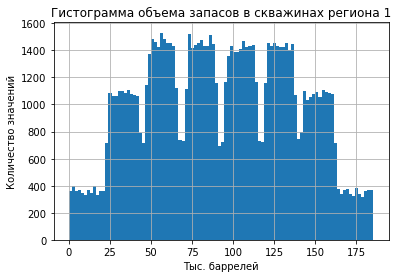

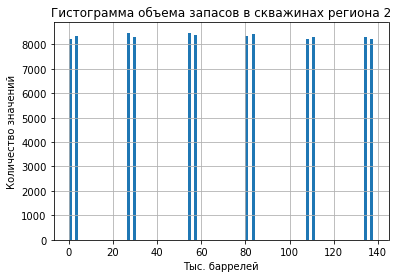

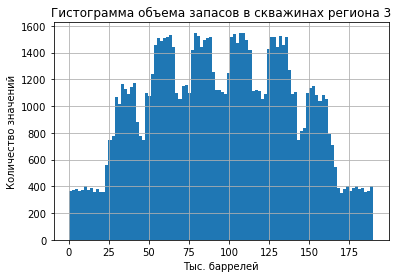

In [14]:
k = 1
for i in regions_y:  
    ax = i.hist(bins=100);
    ax.set_title("Гистограмма объема запасов в скважинах региона {}".format(k))
    ax.set_xlabel("Тыс. баррелей")
    ax.set_ylabel("Количество значений")
    plt.show()
    k+=1

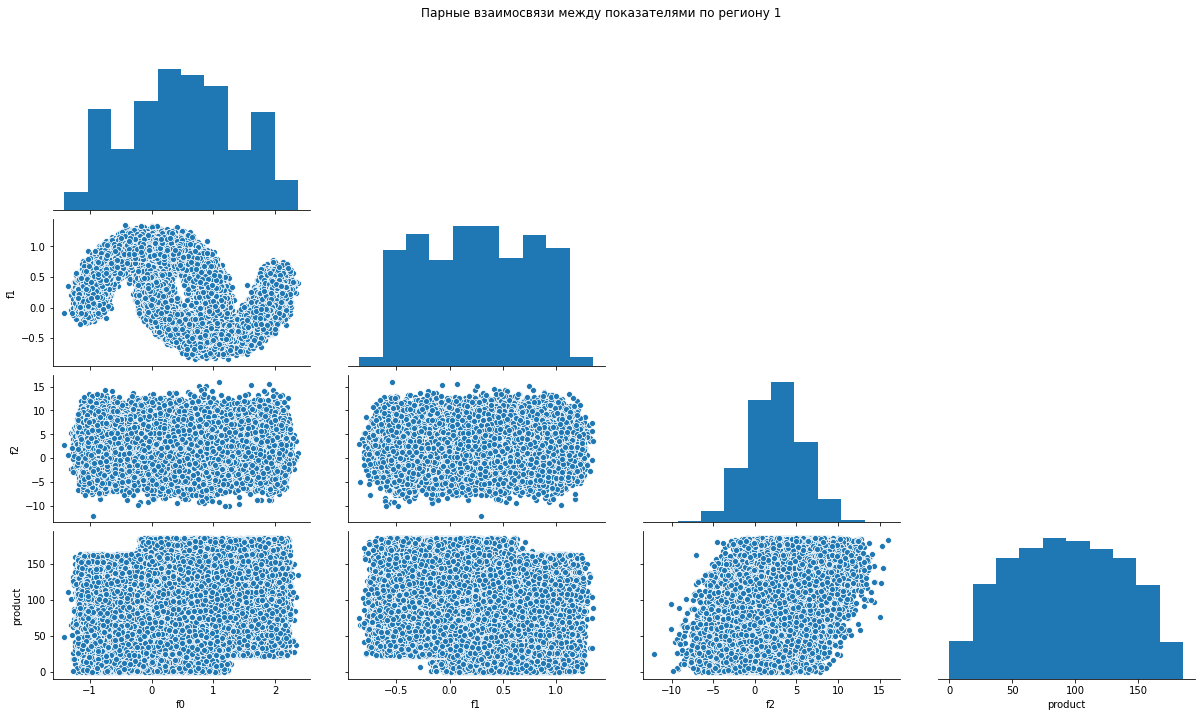

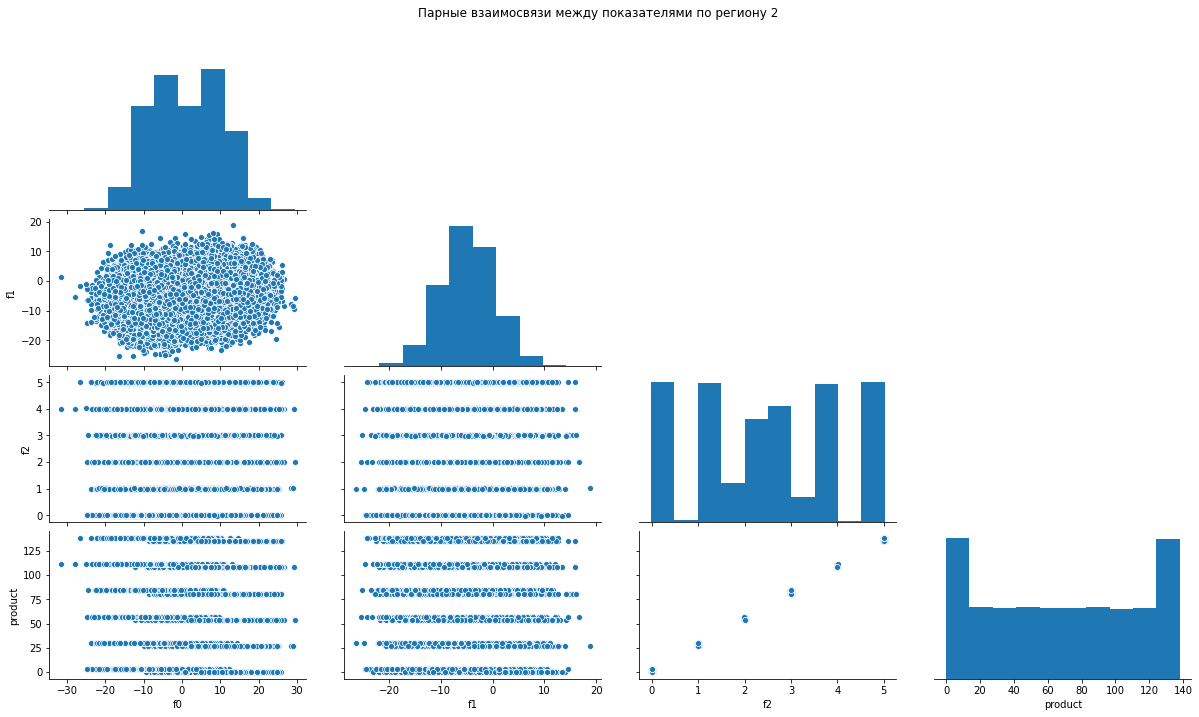

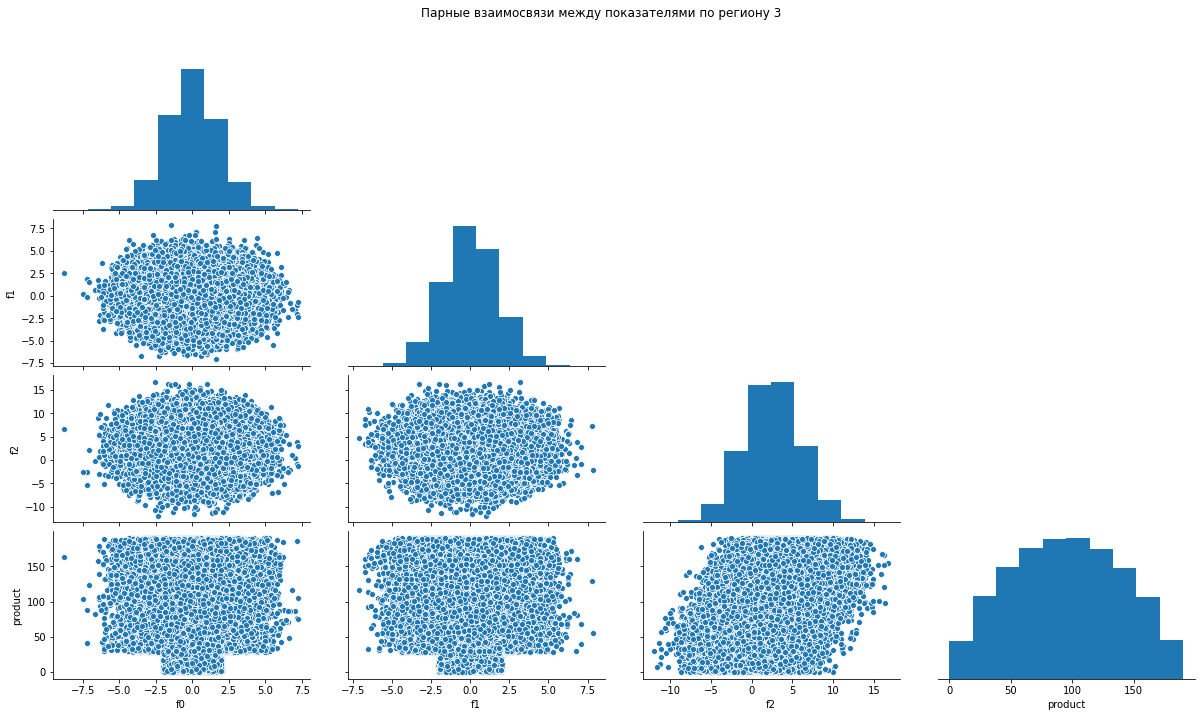

In [15]:
k = 1
for i in regions:  
    ax = sns.pairplot(i, corner=True)
    ax.fig.set_size_inches(17,9)
    ax.fig.suptitle("Парные взаимосвязи между показателями по региону {}".format(k), y=1.08)
    plt.show();
    k+=1

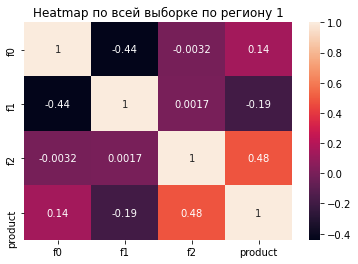

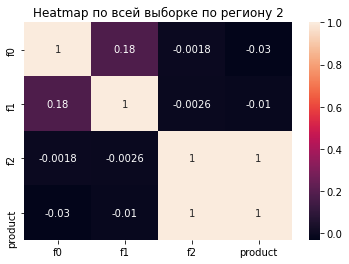

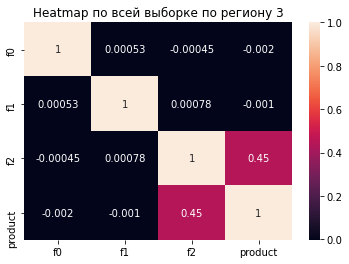

In [16]:
k = 1
for i in regions:  
    ax = sns.heatmap(i.corr(), annot=True)
    ax.set(title="Heatmap по всей выборке по региону {}".format(k))
    plt.show();
    k+=1

## Вывод по 1 разделу

- В исходных данных три таблицы с пятью переменными, product - целевая, f0, f1, f2 - фичи, id при обучении модели можно убрать.
- Посмотрела на исходные данные - предобработка не требуется.
- По трем регионам выделила целевую переменную и призанаки.
- Во втором регионе переменная f2 идеально коррелирует с целевой переменной, в остальных регионах переменная f2 также сильнее всего коррелирует с целевой переменной.

# 2. Обучение и проверка модели<a id="id-fit"></a>

>- Разбейте данные на обучающую и валидационную выборки в соотношении 75:25.
>- Обучите модель и сделайте предсказания на валидационной выборке.
>- Сохраните предсказания и правильные ответы на валидационной выборке.
>- Напечатайте на экране средний запас предсказанного сырья и RMSE модели.
>- Проанализируйте результаты.

In [17]:
r1_X_train, r1_X_test, r1_y_train, r1_y_test = train_test_split(r1_X, r1_y, test_size=0.25, random_state=47)
r2_X_train, r2_X_test, r2_y_train, r2_y_test = train_test_split(r2_X, r2_y, test_size=0.25, random_state=47)
r3_X_train, r3_X_test, r3_y_train, r3_y_test = train_test_split(r3_X, r3_y, test_size=0.25, random_state=47)

In [18]:
def fit_predict_evaluate(X_train, X_test, y_train, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    pred = pd.Series(model.predict(X_test), index=X_test.index)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, pred))
    print('RMSE:', round((rmse), 2))
    print('Предсказанное среднее', round(pred.mean(), 2))
    print('Scattered index', round(rmse/pred.mean(), 2))
    return pred

## Регион 1

In [19]:
r1_pred = fit_predict_evaluate(r1_X_train, r1_X_test, r1_y_train, r1_y_test)

RMSE: 37.52
Предсказанное среднее 92.36
Scattered index 0.41


## Регион 2

In [20]:
r2_pred = fit_predict_evaluate(r2_X_train, r2_X_test, r2_y_train, r2_y_test)

RMSE: 1.6
Предсказанное среднее 68.82
Scattered index 0.02


## Регион 3

In [21]:
r3_pred = fit_predict_evaluate(r3_X_train, r3_X_test, r3_y_train, r3_y_test)

RMSE: 39.99
Предсказанное среднее 95.09
Scattered index 0.42


## Вывод по 2 разделу

- Значение Scattered Index (SI) < 1 говорит о том, что модель адекватная. При первом прогоне SI для второго региона получилось больше единицы. Я посмотрела на матрицу корреляции и заметила, что переменная f2 идеально коррелирует с целевой переменной, а это значит, что мы можем однозначно предсказать целевую переменную только по этой фиче. Я убрала все остальные переменные из обучающего датасета и SI стал 0.02. 
- В остальных регионах такой сильной корреляции нет,  эксперементы с удалением переменных в этих датасетах не привели к снижению RMSE, поэтому оставила как есть. Также в этих регионах значение SI меньше 1, что говорит об адекватности моделей.

# 3. Подготовка к расчёту прибыли<a id="id-profitprep"></a>

>- Все ключевые значения для расчётов сохраните в отдельных переменных.
>- Рассчитайте достаточный объём сырья для безубыточной разработки новой скважины. Сравните полученный объём сырья со средним запасом в каждом регионе.
>- Напишите выводы по этапу подготовки расчёта прибыли.

Напишите функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели:
>-  Выберите скважины с максимальными значениями предсказаний.
>-  Просуммируйте целевое значение объёма сырья, соответствующее этим предсказаниям.
>-  Рассчитайте прибыль для полученного объёма сырья.

In [22]:
BUDGET = 10000000000
REVENUE_PRODUCT_UNIT = 450000
NUMBER_POINTS_OF_INTEREST = 500
NUMBER_BEST_POINTS = 200
RISK_THRESHOLD = .025

In [23]:
payback_point = BUDGET / REVENUE_PRODUCT_UNIT / NUMBER_BEST_POINTS
print(round(payback_point, 2))

111.11


In [24]:
def profit_print(target, prob):
    region_mean = target.mean()
    target_selected = target.sample(n=NUMBER_POINTS_OF_INTEREST, random_state=42)
    prob = prob[target_selected.index]
    prob_sorted = prob.sort_values(ascending=False)
    target_best = target_selected[prob_sorted.index][:NUMBER_BEST_POINTS]
    profit = target_best.sum() * REVENUE_PRODUCT_UNIT - BUDGET
    print("\n Средний запас в скажине тыс. баррелей:", round(target_best.mean(),1), 
          "\n Прибыль для полученного объема сырья руб.:", '{:,}'.format(round(profit, 1)).replace(',', ' '), 
          "\n Средний запас в скважине достаточен для безубыточной разработки новой скважины:",
          target_best.mean()>payback_point, 
        "\n Отношение среднего запаса сырья в выбранных скважинах к среднему запасу в регионе",
          round(target_best.mean()/target.mean(), 2))

## Регион 1

In [25]:
profit_print(r1_y_test, r1_pred)


 Средний запас в скажине тыс. баррелей: 112.9 
 Прибыль для полученного объема сырья руб.: 164 889 425.2 
 Средний запас в скважине достаточен для безубыточной разработки новой скважины: True 
 Отношение среднего запаса сырья в выбранных скважинах к среднему запасу в регионе 1.22


## Регион 2

In [26]:
profit_print(r2_y_test, r2_pred)


 Средний запас в скажине тыс. баррелей: 118.0 
 Прибыль для полученного объема сырья руб.: 623 980 301.3 
 Средний запас в скважине достаточен для безубыточной разработки новой скважины: True 
 Отношение среднего запаса сырья в выбранных скважинах к среднему запасу в регионе 1.72


## Регион 3

In [27]:
profit_print(r3_y_test, r3_pred)


 Средний запас в скажине тыс. баррелей: 109.6 
 Прибыль для полученного объема сырья руб.: -131 642 479.5 
 Средний запас в скважине достаточен для безубыточной разработки новой скважины: False 
 Отношение среднего запаса сырья в выбранных скважинах к среднему запасу в регионе 1.16


## Вывод по 3 разделу

- Средний запас нефти в скважине для безубыточной разработки скважины - 111 тыс. баррелей.
- После случайной выборки 500 скважин и выборки 200 лучших из них в первом и втором регионах средний запас в скважине выше точки безубыточности. Прибыль 165 млн и 624 млн соответственно. Есть смысл обратить внимание на эти регионы, в частности на этом этапе второй регион по расчетам самый привлекательный.
- В 3 регионе средний запас в скважине ниже точки безубыточности. Прогнозируемый убыток после разработки 132 млн.

# 4. Расчёт прибыли и рисков <a id="id-profitrisks"></a>

Посчитайте риски и прибыль для каждого региона:
>- Примените технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.
>- Найдите среднюю прибыль, 95%-й доверительный интервал и риск убытков. Убыток — это отрицательная прибыль.
>- Напишите выводы: предложите регион для разработки скважин и обоснуйте выбор.

In [28]:
state = np.random.RandomState(42)

In [29]:
def profit(target, prob):
    prob_sorted = prob.sort_values(ascending=False)
    selected = target[prob_sorted.index][:NUMBER_BEST_POINTS]
    profit = selected.sum() * REVENUE_PRODUCT_UNIT - BUDGET
    return profit

## Регион 1

In [30]:
values = []
for i in range(1000):
    target = r1_y_test.sample(n=NUMBER_POINTS_OF_INTEREST, random_state=state, replace=True)
    prob = r1_pred[target.index]
    values.append(profit(target, prob))
values = pd.Series(values)

In [31]:
print("Средняя прибыль:", '{:,}'.format(round(values.mean(),1)).replace(',', ' '))
print("С веротяностью 95% среднее генеральной совокупности попадет в промежуток от",
      '{:,}'.format(round(values.quantile(0.025),1)).replace(',', ' '), "до", 
      '{:,}'.format(round(values.quantile(0.925),1)).replace(',', ' '))
print("Риск убытков составляет", "{:.2%}".format(( values < 0 ).astype(int).mean()))
print("Риск убытков меньше заданной границы", ( values < 0 ).astype(int).mean() < RISK_THRESHOLD)

Средняя прибыль: 496 140 546.9
С веротяностью 95% среднее генеральной совокупности попадет в промежуток от -48 128 232.8 до 883 281 959.1
Риск убытков составляет 3.80%
Риск убытков меньше заданной границы False


## Регион 2

In [32]:
values = []
for i in range(1000):
    target = r2_y_test.sample(n=NUMBER_POINTS_OF_INTEREST, random_state=state, replace=True)
    prob = r2_pred[target.index]
    values.append(profit(target, prob))
values = pd.Series(values)

In [33]:
print("Средняя прибыль:", '{:,}'.format(round(values.mean(),1)).replace(',', ' '))
print("С веротяностью 95% среднее генеральной совокупности попадет в промежуток от",
      '{:,}'.format(round(values.quantile(0.025),1)).replace(',', ' '), "до", 
      '{:,}'.format(round(values.quantile(0.925),1)).replace(',', ' '))
print("Риск убытков составляет", "{:.2%}".format(( values < 0 ).astype(int).mean()))
print("Риск убытков меньше заданной границы", ( values < 0 ).astype(int).mean() < RISK_THRESHOLD)

Средняя прибыль: 486 214 823.9
С веротяностью 95% среднее генеральной совокупности попадет в промежуток от 85 772 920.0 до 807 441 819.2
Риск убытков составляет 1.20%
Риск убытков меньше заданной границы True


## Регион 3

In [34]:
values = []
for i in range(1000):
    target = r3_y_test.sample(n=NUMBER_POINTS_OF_INTEREST, random_state=state, replace=True)
    prob = r3_pred[target.index]
    values.append(profit(target, prob))
values = pd.Series(values)

In [35]:
print("Средняя прибыль:", '{:,}'.format(round(values.mean(),1)).replace(',', ' '))
print("С веротяностью 95% среднее генеральной совокупности попадет в промежуток от",
      '{:,}'.format(round(values.quantile(0.025),1)).replace(',', ' '), "до", 
      '{:,}'.format(round(values.quantile(0.925),1)).replace(',', ' '))
print("Риск убытков составляет", "{:.2%}".format(( values < 0 ).astype(int).mean()))
print("Риск убытков меньше заданной границы", ( values < 0 ).astype(int).mean() < RISK_THRESHOLD)

Средняя прибыль: 396 407 279.0
С веротяностью 95% среднее генеральной совокупности попадет в промежуток от -154 075 942.2 до 807 755 548.3
Риск убытков составляет 7.50%
Риск убытков меньше заданной границы False


# Вывод по 4 разделу

- Только второй регион соответствует поставленным условиям - риск убытков меньше заданной границы и составляет 1.2%. 
- Среднее значение прибыли с вероятностью 95% будет не менее 85 772 920 рублей.


Для разработки месторождений рекомендую второй регион.

# Чек-лист готовности проекта<a id="id-open"></a>

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: модели обучены и проверены
    - [x]  Данные корректно разбиты на обучающую и валидационную выборки
    - [x]  Модели обучены, предсказания сделаны
    - [x]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [x]  На экране напечатаны результаты
    - [x]  Сделаны выводы
- [x]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [x]  Для всех ключевых значений созданы константы Python
    - [x]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [x]  По предыдущему пункту сделаны выводы
    - [x]  Написана функция расчёта прибыли
- [x]  Выполнен шаг 4: посчитаны риски и прибыль
    - [x]  Проведена процедура *Bootstrap*
    - [x]  Все параметры бутстрепа соответствуют условию
    - [x]  Найдены все нужные величины
    - [x]  Предложен регион для разработки месторождения
    - [x]  Выбор региона обоснован